In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harry-potter-lstm/Harry_Potter_all_char_separated.txt
/kaggle/input/harry-potter-lstm/Harry_Potter_all_books_preprocessed.txt


In [6]:
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import gensim
import nltk
from wordcloud import WordCloud

In [7]:
with open("/kaggle/input/harry-potter-lstm/Harry_Potter_all_books_preprocessed.txt") as f:
    data = f.read()


In [8]:
data[:1000]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley was the director of a firm called Grunnings which made drills .He was a big beefy man with hardly any neck although he did have a very large mustache .Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors .The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it .They didnt think they could bear it if anyone found out about the Potters .Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in 

In [9]:
Line = sent_tokenize(data)

In [10]:
Line[0][:1000]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley was the director of a firm called Grunnings which made drills .He was a big beefy man with hardly any neck although he did have a very large mustache .Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors .The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it .They didnt think they could bear it if anyone found out about the Potters .Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in 

In [11]:
import re
text = "THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley was the director of a firm called Grunnings which made drills .He was a big beefy man with hardly any neck although he did have a very large mustache .Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors .The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it .They didnt think they could bear it if anyone found out about the Potters .Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in f"
remove_text = re.sub(r'\s\.([A-Z])', r'. \1',text)
print(remove_text)

THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much. They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense. Mr Dursley was the director of a firm called Grunnings which made drills. He was a big beefy man with hardly any neck although he did have a very large mustache. Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it. They didnt think they could bear it if anyone found out about the Potters. Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in f

In [12]:
corpus = re.sub(r'\s\.([A-Z])', r'. \1', data)

In [13]:
lines = sent_tokenize(corpus)

In [14]:
lines[0]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.'

In [15]:
tokens = []
for line in lines:
    tokens.append(gensim.utils.simple_preprocess(line))

In [58]:
tokens[19000]

['the',
 'wizard',
 'in',
 'plusfours',
 'accompanied',
 'them',
 'toward',
 'the',
 'gate',
 'to',
 'the',
 'campsite']

In [17]:
len(tokens)

63880

In [18]:
model = gensim.models.Word2Vec(
window =  6,
min_count = 10,
sg = 2,
negative = 10
)

In [19]:
model.build_vocab(tokens)

In [20]:
model.train(tokens, total_examples=model.corpus_count, epochs = 8)

(6112773, 8429056)

In [21]:
embedding_matrix = model.wv.vectors
embedding_dimensions = embedding_matrix.shape[1]


In [22]:
print("Embedding Dimensions:", embedding_dimensions)

Embedding Dimensions: 100


In [23]:
model.wv.most_similar("hermione")

[('parvati', 0.7053039073944092),
 ('lavender', 0.6749280691146851),
 ('ginny', 0.6531509160995483),
 ('luna', 0.6420907378196716),
 ('encouragingly', 0.6419060230255127),
 ('ron', 0.6383288502693176),
 ('hotly', 0.6324937343597412),
 ('perplexed', 0.6272318959236145),
 ('she', 0.6189786791801453),
 ('wow', 0.6180591583251953)]

In [29]:
model.wv.most_similar("ron")

[('ginny', 0.6853151321411133),
 ('spew', 0.6770310997962952),
 ('encouragingly', 0.6705032587051392),
 ('fervently', 0.6638357639312744),
 ('harry', 0.6590557098388672),
 ('neville', 0.6543751358985901),
 ('perplexed', 0.6532877683639526),
 ('thunderstruck', 0.6468568444252014),
 ('tentatively', 0.6432082653045654),
 ('amazed', 0.6424538493156433)]

In [34]:
model.wv.most_similar("ginny")

[('fred', 0.6900560855865479),
 ('ron', 0.6853150725364685),
 ('bill', 0.666730523109436),
 ('luna', 0.665349543094635),
 ('encouragingly', 0.6621623635292053),
 ('crossly', 0.6588835716247559),
 ('tentatively', 0.6575140953063965),
 ('michael', 0.6568136811256409),
 ('bracingly', 0.6544091701507568),
 ('hermione', 0.6531509160995483)]

In [36]:
model.wv.most_similar("harry")

[('he', 0.7805144786834717),
 ('aghast', 0.7053791284561157),
 ('apologetically', 0.7014397978782654),
 ('scathingly', 0.7002130746841431),
 ('aggressively', 0.6984159350395203),
 ('automatically', 0.697659432888031),
 ('gillyweed', 0.6769431233406067),
 ('thunderstruck', 0.6743479371070862),
 ('fervently', 0.6735654473304749),
 ('grudgingly', 0.6710848212242126)]

In [50]:
model.wv.most_similar("severus")

[('minerva', 0.7155071496963501),
 ('trusting', 0.6879756450653076),
 ('cissy', 0.6876198053359985),
 ('trusts', 0.6871185898780823),
 ('harshly', 0.682228684425354),
 ('alastor', 0.6770081520080566),
 ('coldly', 0.6758171916007996),
 ('snape', 0.6710848808288574),
 ('sibyll', 0.6650230884552002),
 ('dawlish', 0.6599284410476685)]

In [47]:
model.wv.most_similar("dumbledore")

[('slughorn', 0.7116529941558838),
 ('dumbledores', 0.6962748765945435),
 ('snape', 0.696191668510437),
 ('lupin', 0.680770754814148),
 ('riddle', 0.6741169095039368),
 ('dawlish', 0.6510352492332458),
 ('karkaroff', 0.6494510769844055),
 ('wormtail', 0.6381832361221313),
 ('dippet', 0.638165295124054),
 ('minerva', 0.6325060725212097)]

In [52]:
model.wv.most_similar("gryffindor")

[('ravenclaw', 0.726996660232544),
 ('slytherin', 0.7239698767662048),
 ('gryffindors', 0.6576586365699768),
 ('tower', 0.6496924161911011),
 ('locker', 0.6460851430892944),
 ('points', 0.6373358368873596),
 ('possession', 0.6321749687194824),
 ('chaser', 0.6270759105682373),
 ('championship', 0.626960813999176),
 ('team', 0.62647545337677)]

In [59]:
model.wv.most_similar("sister")

[('daughter', 0.6870200634002686),
 ('brother', 0.6756096482276917),
 ('mother', 0.6654441952705383),
 ('husband', 0.6636945605278015),
 ('gabrielle', 0.6596018671989441),
 ('ariana', 0.6499853134155273),
 ('squib', 0.6426921486854553),
 ('girlfriend', 0.6240693926811218),
 ('freak', 0.6142035126686096),
 ('cousin', 0.60593181848526)]

In [61]:
model.wv.most_similar("hogwarts")

[('school', 0.7550288438796997),
 ('witchcraft', 0.7082762122154236),
 ('wizardry', 0.6989664435386658),
 ('gamekeeper', 0.6665465235710144),
 ('home', 0.6260309815406799),
 ('hog', 0.6241219639778137),
 ('durmstrang', 0.615409791469574),
 ('attended', 0.6083270311355591),
 ('express', 0.6024176478385925),
 ('expulsion', 0.6007251143455505)]

In [68]:
db_vector = model.wv['dumbledore']
good_vector = model.wv['good']
evil_vector = model.wv['dark']
result_vector = db_vector - good_vector + evil_vector
most_similar_words = model.wv.similar_by_vector(result_vector)
most = model.wv.similar_by_key(result_vector)
print(most_similar_words)


[('dark', 0.6963935494422913), ('dumbledore', 0.6629055142402649), ('dumbledores', 0.5369001626968384), ('voldemort', 0.5360189080238342), ('basin', 0.5286030769348145), ('snape', 0.4924502968788147), ('pensieve', 0.48408061265945435), ('goblin', 0.4665320813655853), ('wormtail', 0.4550524950027466), ('riddle', 0.4489893615245819)]


In [69]:
print(most)

[('dark', 0.6963935494422913), ('dumbledore', 0.6629055142402649), ('dumbledores', 0.5369001626968384), ('voldemort', 0.5360189080238342), ('basin', 0.5286030769348145), ('snape', 0.4924502968788147), ('pensieve', 0.48408061265945435), ('goblin', 0.4665320813655853), ('wormtail', 0.4550524950027466), ('riddle', 0.4489893615245819)]


In [90]:
characters = [
    "harry",
    "ron",
    "hermione",
    "dumbledore",
    "voldemort",
    "snape",
    "sirius",
    "hagrid",
    "neville",
    "dobby",
    "moody",
    "lupin",
    "wormtail",
    "bellatrix",
    "mcgonagall",
    "ginny",
    "dursley",
    "luna"
    
]

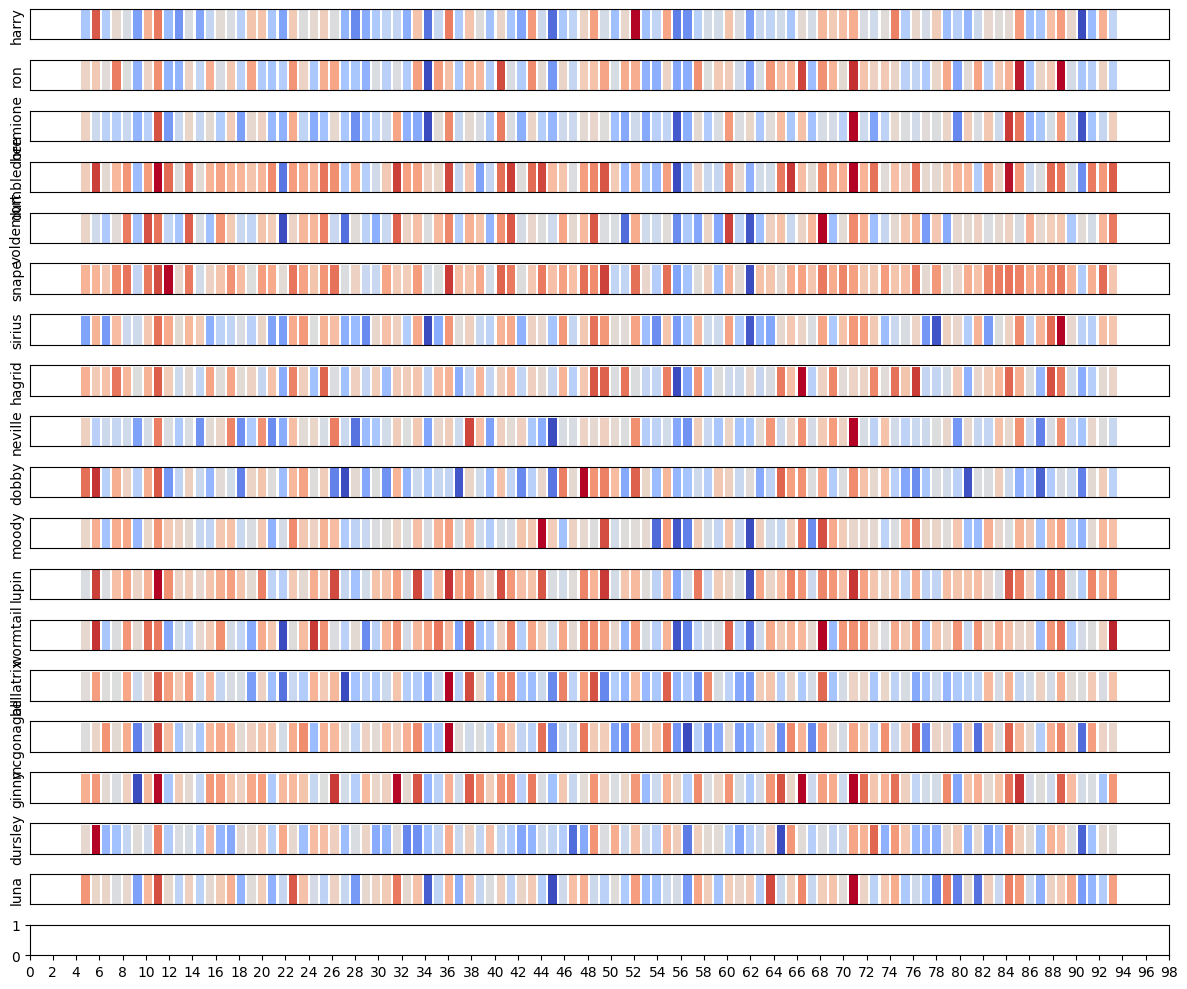

In [91]:
num_element = len(characters)
fig, axs = plt.subplots(num_elements, 1, figsize=(12,  10))
for i, element in enumerate(characters):
    
    vector = model.wv.get_vector(element)
    
    normalized_data = (vector - np.min(vector)) / (np.max(vector) - np.min(vector))
    
    cmap = plt.get_cmap('coolwarm')
    
    colors = [cmap(val) for val in normalized_data]
    
    axs[i].bar(range(len(vector)), [1] * len(vector), color=colors, align='center')
    
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_ylabel(element)

plt.tight_layout()
axs[num_elements - 1].set_xticks(range(0,100,2))
plt.show()

In [92]:
char_vectors = []
for ch in characters:
    char_vectors.append(model.wv.get_vector(ch))

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
feature = pca.fit_transform(char_vectors)

In [104]:
import plotly.express as pd
fig = px.scatter_3d(feature, x=0,y=1,z=2, color = characters)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [105]:
def getParsedList(character, POS):
    tags = []
    for line in lines:
        if character in line.lower().split(" "): 
            pos_tags = nltk.pos_tag(gensim.utils.simple_preprocess(line))
            tags = tags + [word for word, pos_tag in pos_tags if pos_tag.startswith(POS) ]
    return tags

In [112]:
def creatWordcloud(parsed_list, stopwords):
    text = ' '.join(parsed_list)

    wordcloud = WordCloud(stopwords = stopwords, width=800, height=400, max_words= 150).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

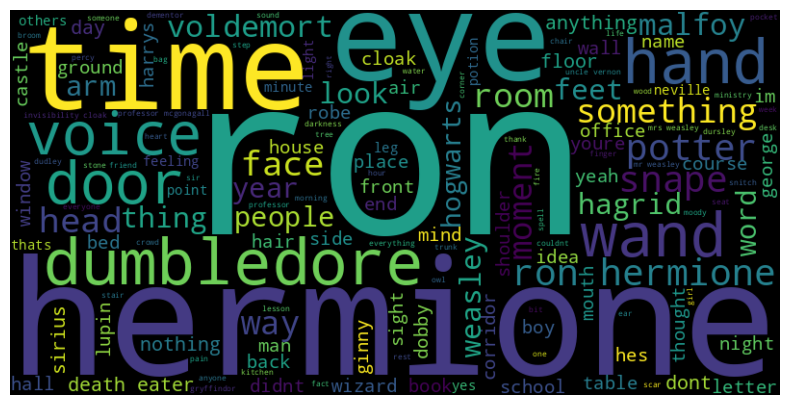

In [115]:
creatWordcloud(getParsedList("harry", "NN"), ["harry"])

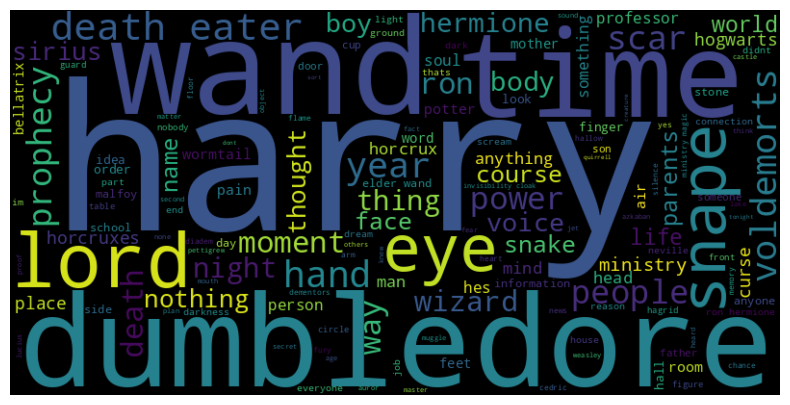

In [111]:
creatWordcloud(getParsedList("voldemort", "NN"), ["voldemort"])

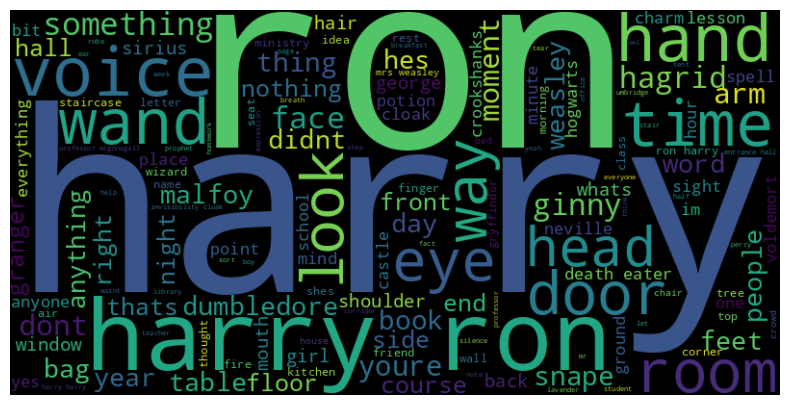

In [116]:
creatWordcloud(getParsedList("hermione","NN"), ["hermione"])

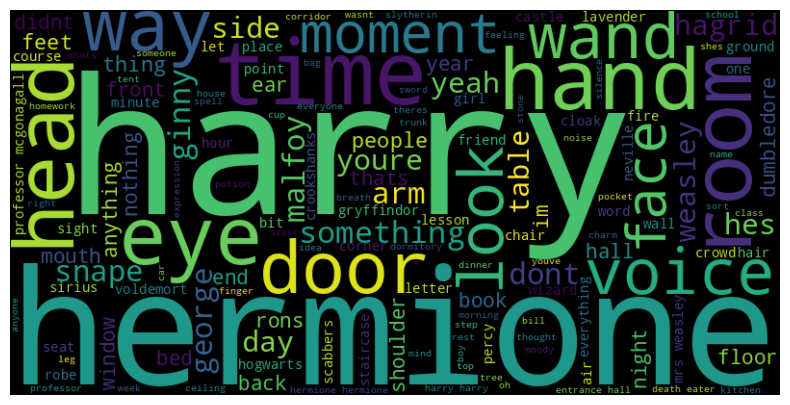

In [117]:
creatWordcloud(getParsedList("ron","NN"), ["ron"])

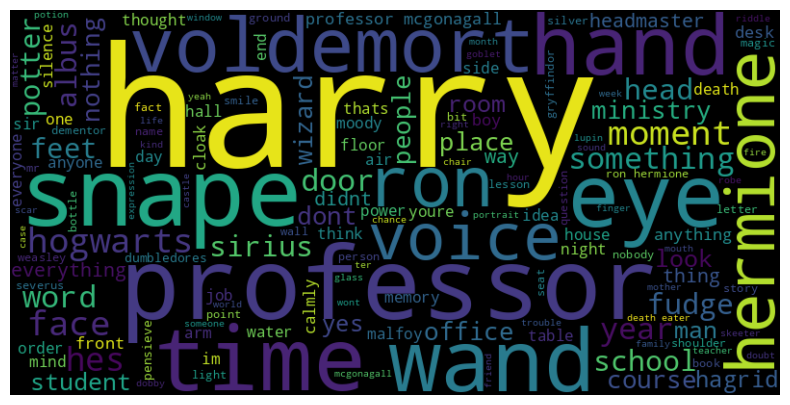

In [118]:
creatWordcloud(getParsedList("dumbledore","NN"), ["dumbledore"])

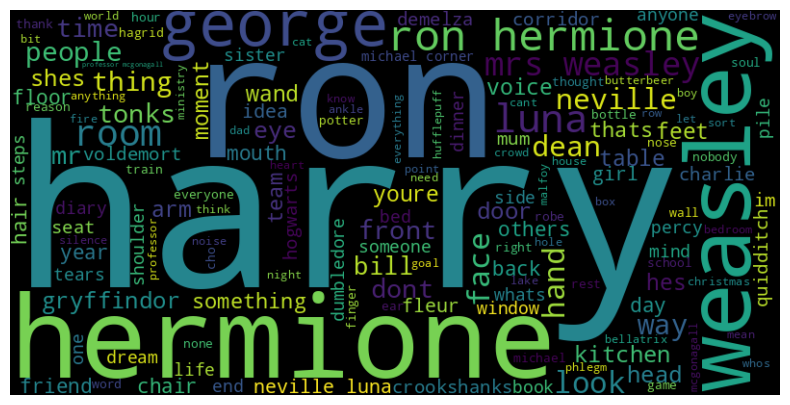

In [122]:
creatWordcloud(getParsedList("ginny", "NN"), ["ginny"])
#creatWordcloud(getParsedList("dumbledore","NN"), ["dumbledore"])